In [14]:
import torch
from torchvision.transforms import functional as F
from PIL import Image

pregen_imgs_path = "/export/home/ra48gaq/code/ILLUME_plus/outputs/albatross.n.02_gen_imgs_per_dir_per_q.pth"
with open(pregen_imgs_path, 'rb') as f:
    pregen_imgs = torch.load(f, weights_only=False, map_location="cuda")
print(f"{pregen_imgs.keys()=}")


pregen_imgs.keys()=dict_keys(['animal.n.01', 'bird.n.01'])


In [ ]:
from einops import rearrange
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transformed = transform(rearrange(pregen_imgs['bird.n.01']['albatross.n.02'][0], "h w c -> c h w"))

SyntaxError: unexpected EOF while parsing (2858049544.py, line 9)

In [15]:
len(pregen_imgs['bird.n.01']['albatross.n.02'])
pregen_imgs['bird.n.01']['albatross.n.02'][0].device

device(type='cuda', index=0)

In [11]:
print(f"{pregen_imgs['bird.n.01']['albatross.n.02'][0].shape=}")
print(f"{pregen_imgs['bird.n.01']['albatross.n.02'][0].min()=}")
print(f"{pregen_imgs['bird.n.01']['albatross.n.02'][0].max()=}")

pregen_imgs['bird.n.01']['albatross.n.02'][0].shape=torch.Size([256, 256, 3])
pregen_imgs['bird.n.01']['albatross.n.02'][0].min()=tensor(0.)
pregen_imgs['bird.n.01']['albatross.n.02'][0].max()=tensor(1.)


stacked_tensor.shape=torch.Size([10, 256, 256, 3])
stacked_tensor.shape=torch.Size([3, 256, 2560])


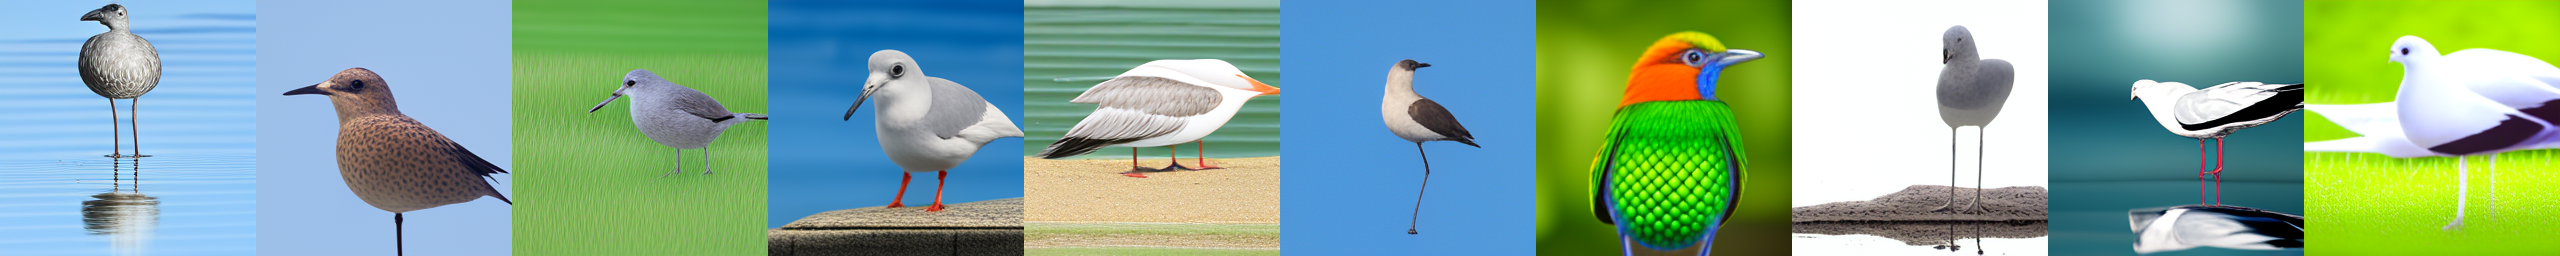

In [13]:
from einops import rearrange

stacked_tensor = torch.stack(pregen_imgs['bird.n.01']['albatross.n.02'][:10])
print(f"{stacked_tensor.shape=}")
stacked_tensor = rearrange(stacked_tensor, "b h w c -> c h (b w)")
print(f"{stacked_tensor.shape=}")
pil_img = F.to_pil_image(stacked_tensor)
# pil_img = F.to_pil_image(pregen_imgs['bird.n.01']['albatross.n.02'][0])
pil_img.show()